In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset URL
url = 'https://raw.githubusercontent.com/pritom02bh/Car-Purchase-Amount-Prediction-Project-for-Car-Industry/master/Car_Purchasing_Data.csv'

# Load the dataset
df = pd.read_csv(url, encoding='ISO-8859-1')
print("Data loaded!")

# Display the first 5 rows
print("\nFirst 5 Rows of the Dataset")
display(df.head())

# The dataset structure
print("\nDataset Information")
print(df.info())

Data loaded!

First 5 Rows of the Dataset


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248



Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB
None


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Define features for customer segmentation: Age, Annual Salary, and Net Worth
features = ['Age', 'Annual Salary', 'Net Worth']
X = df[features]

# Critical Step: Feature Scaling (Normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use K-Means clustering to divide customers into 3 segments
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and assign cluster labels
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nDistribution of Customers per Cluster")
print(df['Cluster'].value_counts())

# Analyze the characteristics of each customer segment
print("\nCluster Feature Summary (Mean Values)")
# Group by Cluster and calculate the average for features and the target variable
cluster_summary = df.groupby('Cluster')[features + ['Car Purchase Amount']].mean()
display(cluster_summary)


Distribution of Customers per Cluster
Cluster
2    198
1    154
0    148
Name: count, dtype: int64

Cluster Feature Summary (Mean Values)


,Age,Annual Salary,Net Worth,Car Purchase Amount
Cluster,,,,
0,51.420325,64343.427871,263730.977043,44952.457755
1,50.255455,62912.597799,613961.650690,53318.345629
2,39.248934,59859.860696,414927.161636,36570.255730


Model Accuracy (R² Score): 0.9633
Mean Absolute Error (MAE): 1411

Key Factors Influencing Car Purchase Amount
Age                 0.398301
Annual Salary       0.375102
Net Worth           0.222759
Credit Card Debt    0.003839
dtype: float32


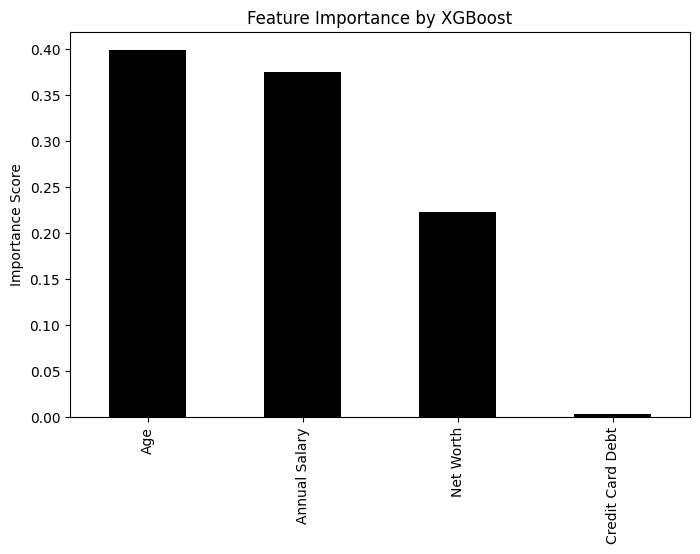

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

# Input features: Age, Annual Salary, Credit Card Debt, Net Worth
X = df[['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']]
# Target variable: Car Purchase Amount
y = df['Car Purchase Amount']

# Split the data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,             # Number of trees
    learning_rate=0.1,            # Step size shrinkage
    max_depth=5,                  # Maximum tree depth
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred)
error = mean_absolute_error(y_test, y_pred)

print(f"Model Accuracy (R² Score): {score:.4f}")
print(f"Mean Absolute Error (MAE): {error:.0f}")

# Determine feature importance according to XGBoost
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nKey Factors Influencing Car Purchase Amount")
print(feature_importance)

# Visualization
plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar', color='black')
plt.title('Feature Importance by XGBoost')
plt.ylabel('Importance Score')
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Construct a virtual car inventory
# A-Series (Entry-level)
# M-Series (Mid-range)
# X-Series (Luxury)

car_inventory = pd.DataFrame({
    'Car_Model': [
        # A-Series: Corresponds to Cluster 2, Entry-level
        'A100', 'A150', 'A200', 'A200', 'A250', 'A-300', 'A-City',

        # M-Series: Corresponds to Cluster 0, Middle-class
        'M400', 'M450', 'M500', 'M550', 'M600', 'M650', 'M-Explorer',

        # X-Series: Corresponds to Cluster 1, Luxury
        'X700', 'X800', 'X850', 'X900', 'X950', 'X-Concept', 'X-President'
    ],
    'Price': [
        # Cluster 2, A-Series: 18k - 26k
        18000, 20000, 22000, 21000, 24000, 25000, 26000,

        # Cluster 0, M-Series: 31k - 48k
        31000, 33000, 35000, 40000, 45000, 42000, 48000,

        # Cluster 1, X-Series: 52k - 90k+
        52000, 58000, 65000, 75000, 85000, 90000, 95000
    ],
    'Category_ID': [
        # Corresponding to A-Series
        2, 2, 2, 2, 2, 2, 2,
        # Corresponding to M-Series
        0, 0, 0, 0, 0, 0, 0,
        # Corresponding to X-Series
        1, 1, 1, 1, 1, 1, 1
    ]
})

# Check the car inventory
print("\nCar Inventory:")
print(car_inventory[['Car_Model', 'Price']])

# Recommendation Function

def get_recommendations(user_budget, user_cluster_id):
    # Logic
    # 1. Filter the suitable "Car Series" based on the User Cluster.
    # 2. Within the "Car Series", use KNN to find 3 cars with prices closest to the budget.


    # Filter cars matching the user segment
    candidate_cars = car_inventory[car_inventory['Category_ID'] == user_cluster_id].copy()

    if candidate_cars.empty:
        candidate_cars = car_inventory.copy()

    # Train KNN on candidate cars
    X_candidates = candidate_cars[['Price']]

    knn = NearestNeighbors(n_neighbors=3, algorithm='auto')
    knn.fit(X_candidates)

    # Query
    query_price = pd.DataFrame([[user_budget]], columns=['Price'])
    distances, indices = knn.kneighbors(query_price)

    # Get results
    recommended_cars = candidate_cars.iloc[indices[0]]

    return recommended_cars


Car Inventory:
      Car_Model  Price
0          A100  18000
1          A150  20000
2          A200  22000
3          A200  21000
4          A250  24000
5         A-300  25000
6        A-City  26000
7          M400  31000
8          M450  33000
9          M500  35000
10         M550  40000
11         M600  45000
12         M650  42000
13   M-Explorer  48000
14         X700  52000
15         X800  58000
16         X850  65000
17         X900  75000
18         X950  85000
19    X-Concept  90000
20  X-President  95000


In [13]:
# Reinforcement Learning

# Environment: Simulates customer response to discounts
# Uses the "budget" predicted by XGBoost as the customer's reservation price
class SalesEnvironment:
    def __init__(self, customer_budget, car_price):
        self.budget = customer_budget
        self.base_price = car_price

    def offer(self, action):
        # Action Space: 0 = Original Price, 1 = 2% Off, 2 = 5% Off
        discounts = [1.0, 0.98, 0.95]
        final_price = self.base_price * discounts[action]

        # Calculate profit, assuming cost is 85% of the base price
        cost = self.base_price * 0.85
        profit = final_price - cost

        # Customer Decision: Purchase only if final_price <= budget
        if final_price <= self.budget:
            return True, final_price, profit
        else:
            return False, final_price, 0

# Agent: Responsible for decision making
class PricingAgent:
    def __init__(self):
        # Q-Table: Value table for the 3 actions
        self.q_table = np.zeros(3)
        self.epsilon = 0.1

    def choose_action(self, is_training=False):
        if is_training and np.random.rand() < self.epsilon:
            return np.random.randint(3)
        return np.argmax(self.q_table)

    def learn(self, action, reward):
        learning_rate = 0.1
        # Update the value estimation for this action
        self.q_table[action] += learning_rate * (reward - self.q_table[action])

# Pre-train the Agent by simulating 1000 sales processes
agent = PricingAgent()

# Train using average values from previous data, generating 1000 mock budgets
mock_budgets = np.random.normal(50000, 15000, 1000)

for b in mock_budgets:
    mock_price = b * np.random.uniform(0.9, 1.2)
    env = SalesEnvironment(b, mock_price)

    action = agent.choose_action(is_training=True)
    is_deal, _, profit = env.offer(action)

    # Reward is profit if deal is made, otherwise -100 (penalty for losing the sale)
    reward = profit if is_deal else -100
    agent.learn(action, reward)

print("Training complete. Generated Q-Table:", agent.q_table.astype(int))

Training complete. Generated Q-Table: [2073 1704 2399]


In [14]:
# 3. Client Reception
print("Automotive Budget Prediction and Pricing Model")
print("Please enter customer details:\n")

try:
    # Input Data
    input_age = float(input("1. Enter Customer Age: "))
    input_salary = float(input("2. Enter Annual Salary ($): "))
    input_debt = float(input("3. Enter Credit Card Debt ($): "))
    input_worth = float(input("4. Enter Net Worth ($): "))

    # Create DataFrame for prediction
    current_customer = pd.DataFrame({
        'Age': [input_age],
        'Annual Salary': [input_salary],
        'Credit Card Debt': [input_debt],
        'Net Worth': [input_worth]
    })


    # XGBoost Prediction
    predicted_budget = model.predict(current_customer)[0]

    # Customer Segmentation & KNN Recommendation

    if input_age < 40:
        u_cluster = 2
        label = "Starter"
    elif input_salary > 80000:
        u_cluster = 1
        label = "Affluent Elite"
    else:
        u_cluster = 0
        label = "Middle Class"

    recs = get_recommendations(predicted_budget, u_cluster)

    # Report Display
    print(f"\nCustomer Profile: {label} | Predicted Budget: ${predicted_budget:,.0f}")

    # Loop through the 3 recommended cars for RL decision
    for index, row in recs.iterrows():
        car_name = row['Car_Model']
        car_price = row['Price']

        # Instantiate RL Environment for this specific car
        env = SalesEnvironment(customer_budget=predicted_budget, car_price=car_price)

        # Agent makes a decision
        action = agent.choose_action(is_training=False)

        # Get result from environment
        is_deal, final_offer, _ = env.offer(action)

        # Mapping actions to English strategy names
        strategy_name = ["Manufacturer's Suggested Retail Price (No Discount)", "2% Off", "5% Off"][action]

        # Status icon description
        if is_deal:
            status_icon = "High Conversion Probability"
        else:
            status_icon = "Low Conversion Probability"

        print(f"\nRecommendation: {car_name}")
        print(f"   • Manufacturer's Suggested Retail Price: ${car_price:,.0f}")
        print(f"   • Strategy: [{strategy_name}]，Offer Price: ${final_offer:,.0f}")
        print(f"   • Analysis: {status_icon}")

        if not is_deal:
            diff = final_offer - predicted_budget
            print(f"     Note: Price exceeds budget by ${diff:,.0f}")


except ValueError:
    print("Input Error: Please enter valid numbers only.")
except NameError:
    print("Error: Models not defined. Please run previous training cells first.")

Automotive Budget Prediction and Pricing Model
Please enter customer details:

1. Enter Customer Age: 30
2. Enter Annual Salary ($): 80000
3. Enter Credit Card Debt ($): 20000
4. Enter Net Worth ($): 100000

Customer Profile: Starter | Predicted Budget: $36,043

Recommendation: A-City
   • Manufacturer's Suggested Retail Price: $26,000
   • Strategy: [5% Off]，Offer Price: $24,700
   • Analysis: High Conversion Probability

Recommendation: A-300
   • Manufacturer's Suggested Retail Price: $25,000
   • Strategy: [5% Off]，Offer Price: $23,750
   • Analysis: High Conversion Probability

Recommendation: A250
   • Manufacturer's Suggested Retail Price: $24,000
   • Strategy: [5% Off]，Offer Price: $22,800
   • Analysis: High Conversion Probability
